In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt
from sklearn.preprocessing import MinMaxScaler as mms
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv("dadosTrain.csv")
data_over = pd.read_csv("oversample_data.csv")
data_under = pd.read_csv("undersample_data.csv")
data_smote = pd.read_csv("smote_data.csv")

In [4]:
atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

# DATA TRAIN

In [438]:
Xr = data_raw[atributes]
Yr = data_raw["is_fraud"]

In [439]:
scaler = mms().fit(Xr)

In [440]:
Xr = scaler.transform(Xr)

In [441]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr, Yr, test_size = 0.1, random_state = 42) 

In [442]:
lr = LogisticRegression(penalty= 'l1', C= 1000, solver = 'liblinear', random_state = 42)

In [443]:
lr.fit(Xr_train, Yr_train)

LogisticRegression(C=1000, penalty='l1', random_state=42, solver='saga')

In [444]:
Yr_pred = lr.predict(Xr_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    128895
           1       0.50      0.08      0.13       773

    accuracy                           0.99    129668
   macro avg       0.75      0.54      0.57    129668
weighted avg       0.99      0.99      0.99    129668


Confusion Matrix :
 [[128835     60]
 [   713     60]]

Acuracia: 0.9940386217108307

ROC AUC: 0.861540860273816 



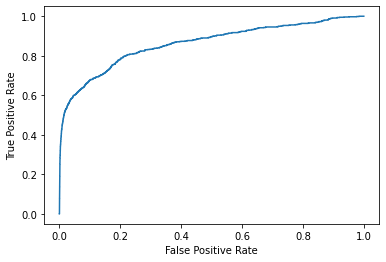

In [445]:
print('Classification metrics: \n', mt.classification_report(Yr_test,Yr_pred))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Yr_test, Yr_pred))
print('\nAcuracia:', mt.accuracy_score(Yr_test, Yr_pred))

Yr_pred_proba = lr.predict_proba(Xr_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Yr_test, Yr_pred_proba)
print('\nROC AUC:', mt.roc_auc_score(Yr_test, Yr_pred_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# OVERSAMPLE

In [422]:
Xo = data_over[atributes]
Yo = data_over["is_fraud"]

In [423]:
scaler = mms().fit(Xo)

In [424]:
Xo = scaler.transform(Xo)

In [425]:
Xo_train, Xo_test, Yo_train, Yo_test = train_test_split(Xo, Yo, test_size = 0.2, random_state = 42) 

In [426]:
lr = LogisticRegression(penalty= 'l1', C= 1000, solver = 'liblinear', random_state = 42)

In [427]:
lr.fit(Xo_train, Yo_train)

LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')

In [428]:
Yo_pred = lr.predict(Xo_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87    257186
           1       0.92      0.80      0.85    258482

    accuracy                           0.86    515668
   macro avg       0.87      0.86      0.86    515668
weighted avg       0.87      0.86      0.86    515668


Confusion Matrix :
 [[238364  18822]
 [ 52636 205846]]

Acuracia: 0.8614263440818511

ROC AUC: 0.91010992993163 



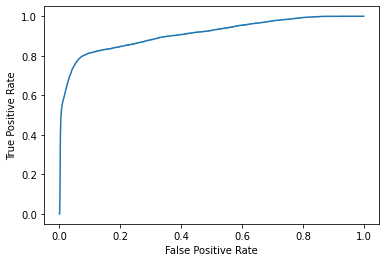

In [429]:
print('Classification metrics: \n', mt.classification_report(Yo_test,Yo_pred))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Yo_test, Yo_pred))
print('\nAcuracia:', mt.accuracy_score(Yo_test, Yo_pred))

Yo_pred_proba = lr.predict_proba(Xo_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Yo_test, Yo_pred_proba)
print('\nROC AUC:', mt.roc_auc_score(Yo_test, Yo_pred_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# UNDERSAMPLE

In [390]:
Xu = data_under[atributes]
Yu = data_under["is_fraud"]

In [391]:
scaler = mms().fit(Xu)

In [392]:
Xu = scaler.transform(Xu)

In [393]:
Xu_train, Xu_test, Yu_train, Yu_test = train_test_split(Xu, Yu, test_size = 0.2, random_state = 42) 

In [394]:
lr = LogisticRegression(penalty= 'l1', C= 1000, solver = 'liblinear', random_state = 42)

In [395]:
lr.fit(Xu_train, Yu_train)

LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')

In [396]:
Yu_pred = lr.predict(Xu_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1507
           1       0.91      0.79      0.84      1496

    accuracy                           0.85      3003
   macro avg       0.86      0.85      0.85      3003
weighted avg       0.86      0.85      0.85      3003


Confusion Matrix :
 [[1386  121]
 [ 317 1179]]

Acuracia: 0.8541458541458542

ROC AUC: 0.9104486549400481 



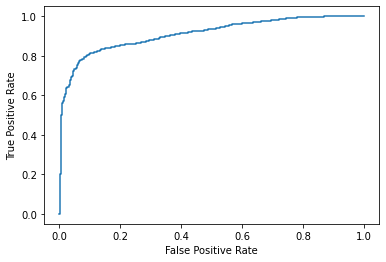

In [397]:
print('Classification metrics: \n', mt.classification_report(Yu_test,Yu_pred))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Yu_test, Yu_pred))
print('\nAcuracia:', mt.accuracy_score(Yu_test, Yu_pred))

Yu_pred_proba = lr.predict_proba(Xu_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Yu_test, Yu_pred_proba)
print('\nROC AUC:', mt.roc_auc_score(Yu_test, Yu_pred_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SMOTE

In [398]:
Xs = data_smote[atributes]
Ys = data_smote["is_fraud"]

In [399]:
scaler = mms().fit(Xs)

In [400]:
Xs = scaler.transform(Xs)

In [401]:
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(Xs, Ys, test_size = 0.2, random_state = 42 )

In [402]:
lr = LogisticRegression(penalty= 'l1', C= 1000, solver = 'saga', random_state = 42)

In [403]:
lr.fit(Xs_train, Ys_train)

LogisticRegression(C=1000, penalty='l1', random_state=42, solver='liblinear')

In [404]:
Ys_pred = lr.predict(Xs_test)

Classification metrics: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90    257186
           1       0.94      0.85      0.89    258482

    accuracy                           0.89    515668
   macro avg       0.90      0.89      0.89    515668
weighted avg       0.90      0.89      0.89    515668


Confusion Matrix :
 [[242087  15099]
 [ 39984 218498]]

Acuracia: 0.8931812716709201

ROC AUC: 0.9481724239483793 



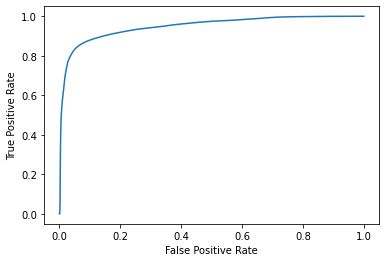

In [405]:
print('Classification metrics: \n', mt.classification_report(Ys_test,Ys_pred))
print('\nConfusion Matrix :\n', mt.confusion_matrix(Ys_test, Ys_pred))
print('\nAcuracia:', mt.accuracy_score(Ys_test, Ys_pred))

Ys_pred_proba = lr.predict_proba(Xs_test)[:,1]
fpr, tpr, _ = mt.roc_curve(Ys_test, Ys_pred_proba)
print('\nROC AUC:', mt.roc_auc_score(Ys_test, Ys_pred_proba),'\n')

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()